## Deep Learning2 - Ch.1 

### neural network: spiral data

In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import import_ipynb
from optimizer import *
from dataset2 import spiral
from layers_collection import *
from Neural_Network import neural_network
from dataset2 import ptb
from DeepLearning2_modules import *
from layers_collection2 import *
from negative_sampling_layer import NegativeSamplingLoss
from trainer import *

matplotlib.rc('font', family='Malgun Gothic')

C:\ana3\envs\t_f2.2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


importing Jupyter notebook from optimizer.ipynb
importing Jupyter notebook from layers_collection.ipynb
importing Jupyter notebook from Neural_Network.ipynb
importing Jupyter notebook from DeepLearning2_modules.ipynb
importing Jupyter notebook from layers_collection2.ipynb
importing Jupyter notebook from negative_sampling_layer.ipynb
importing Jupyter notebook from trainer.ipynb


In [4]:
max_epoch = 300
batch_size =30
learning_rate = 0.01

x, y = spiral.load_data()

network = neural_network(input_size=2, hidden_size=[10,10],output_size=3,activation='sigmoid')
optimizer = adam(lr=learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    y = y[idx]
    
    for i in range(max_iters):
        x_batch = x[i*batch_size:(i+1)*batch_size]
        y_batch = y[i*batch_size:(i+1)*batch_size]
        
        grads = network.gradient(x_batch, y_batch)
        optimizer.update(network.params, grads)
        loss = network.loss(x_batch,y_batch)
        
        total_loss += loss
        loss_count += 1
        
        if (i+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('|epoch %d| iteration %d/%d| loss %.2f'%(epoch+1, i+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0
            

|epoch 1| iteration 10/10| loss 1.05
|epoch 2| iteration 10/10| loss 1.03
|epoch 3| iteration 10/10| loss 1.00
|epoch 4| iteration 10/10| loss 0.98
|epoch 5| iteration 10/10| loss 0.95
|epoch 6| iteration 10/10| loss 0.92
|epoch 7| iteration 10/10| loss 0.90
|epoch 8| iteration 10/10| loss 0.88
|epoch 9| iteration 10/10| loss 0.86
|epoch 10| iteration 10/10| loss 0.84
|epoch 11| iteration 10/10| loss 0.83
|epoch 12| iteration 10/10| loss 0.82
|epoch 13| iteration 10/10| loss 0.81
|epoch 14| iteration 10/10| loss 0.80
|epoch 15| iteration 10/10| loss 0.79
|epoch 16| iteration 10/10| loss 0.78
|epoch 17| iteration 10/10| loss 0.77
|epoch 18| iteration 10/10| loss 0.77
|epoch 19| iteration 10/10| loss 0.76
|epoch 20| iteration 10/10| loss 0.76
|epoch 21| iteration 10/10| loss 0.76
|epoch 22| iteration 10/10| loss 0.76
|epoch 23| iteration 10/10| loss 0.75
|epoch 24| iteration 10/10| loss 0.75
|epoch 25| iteration 10/10| loss 0.75
|epoch 26| iteration 10/10| loss 0.74
|epoch 27| iteration 

|epoch 225| iteration 10/10| loss 0.07
|epoch 226| iteration 10/10| loss 0.07
|epoch 227| iteration 10/10| loss 0.07
|epoch 228| iteration 10/10| loss 0.07
|epoch 229| iteration 10/10| loss 0.07
|epoch 230| iteration 10/10| loss 0.07
|epoch 231| iteration 10/10| loss 0.07
|epoch 232| iteration 10/10| loss 0.07
|epoch 233| iteration 10/10| loss 0.07
|epoch 234| iteration 10/10| loss 0.06
|epoch 235| iteration 10/10| loss 0.06
|epoch 236| iteration 10/10| loss 0.06
|epoch 237| iteration 10/10| loss 0.06
|epoch 238| iteration 10/10| loss 0.06
|epoch 239| iteration 10/10| loss 0.06
|epoch 240| iteration 10/10| loss 0.06
|epoch 241| iteration 10/10| loss 0.06
|epoch 242| iteration 10/10| loss 0.06
|epoch 243| iteration 10/10| loss 0.06
|epoch 244| iteration 10/10| loss 0.06
|epoch 245| iteration 10/10| loss 0.06
|epoch 246| iteration 10/10| loss 0.06
|epoch 247| iteration 10/10| loss 0.06
|epoch 248| iteration 10/10| loss 0.06
|epoch 249| iteration 10/10| loss 0.06
|epoch 250| iteration 10/

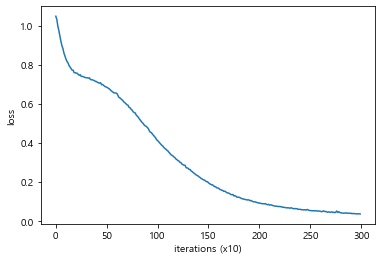

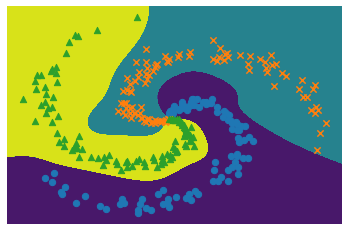

In [5]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = network.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## Deep Learning2 - Ch.2

### statistical based method 

In [2]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('Create Co-occurrence Matrix...')
C = create_co_matrix(corpus, vocab_size, window_size)

print('PPMI 계산...')
W = ppmi(C, verbose=True)

try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except:
    # SVD
    U, S, V = np.linalg.svd(W)

    
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

importing Jupyter notebook from DeepLearning2_modules.ipynb
Create Co-occurrence Matrix...
PPMI 계산...


<string>:135: RuntimeWarning: overflow encountered in long_scalars
<string>:135: RuntimeWarning: invalid value encountered in log2


1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
79.00 완료
80.00 완료
81.00 완료
82.00 완료
83.00 완료
84.00 완료
85.00 완료
86.00 완료
87.00 완료
88.00 완료
89.00 완료
90.00 완료
91.00 완료
92.00 완료
93.00 완료
94.00 완료
95.00 완료
96.00 완료
97.00 완료
98.00 완료
99.00 완료
100.00 완료

[query] you
 i: 0.7184017896652222
 we: 0.6420310735702515
 'd: 0.535369873046875
 've: 0.531747043132782
 

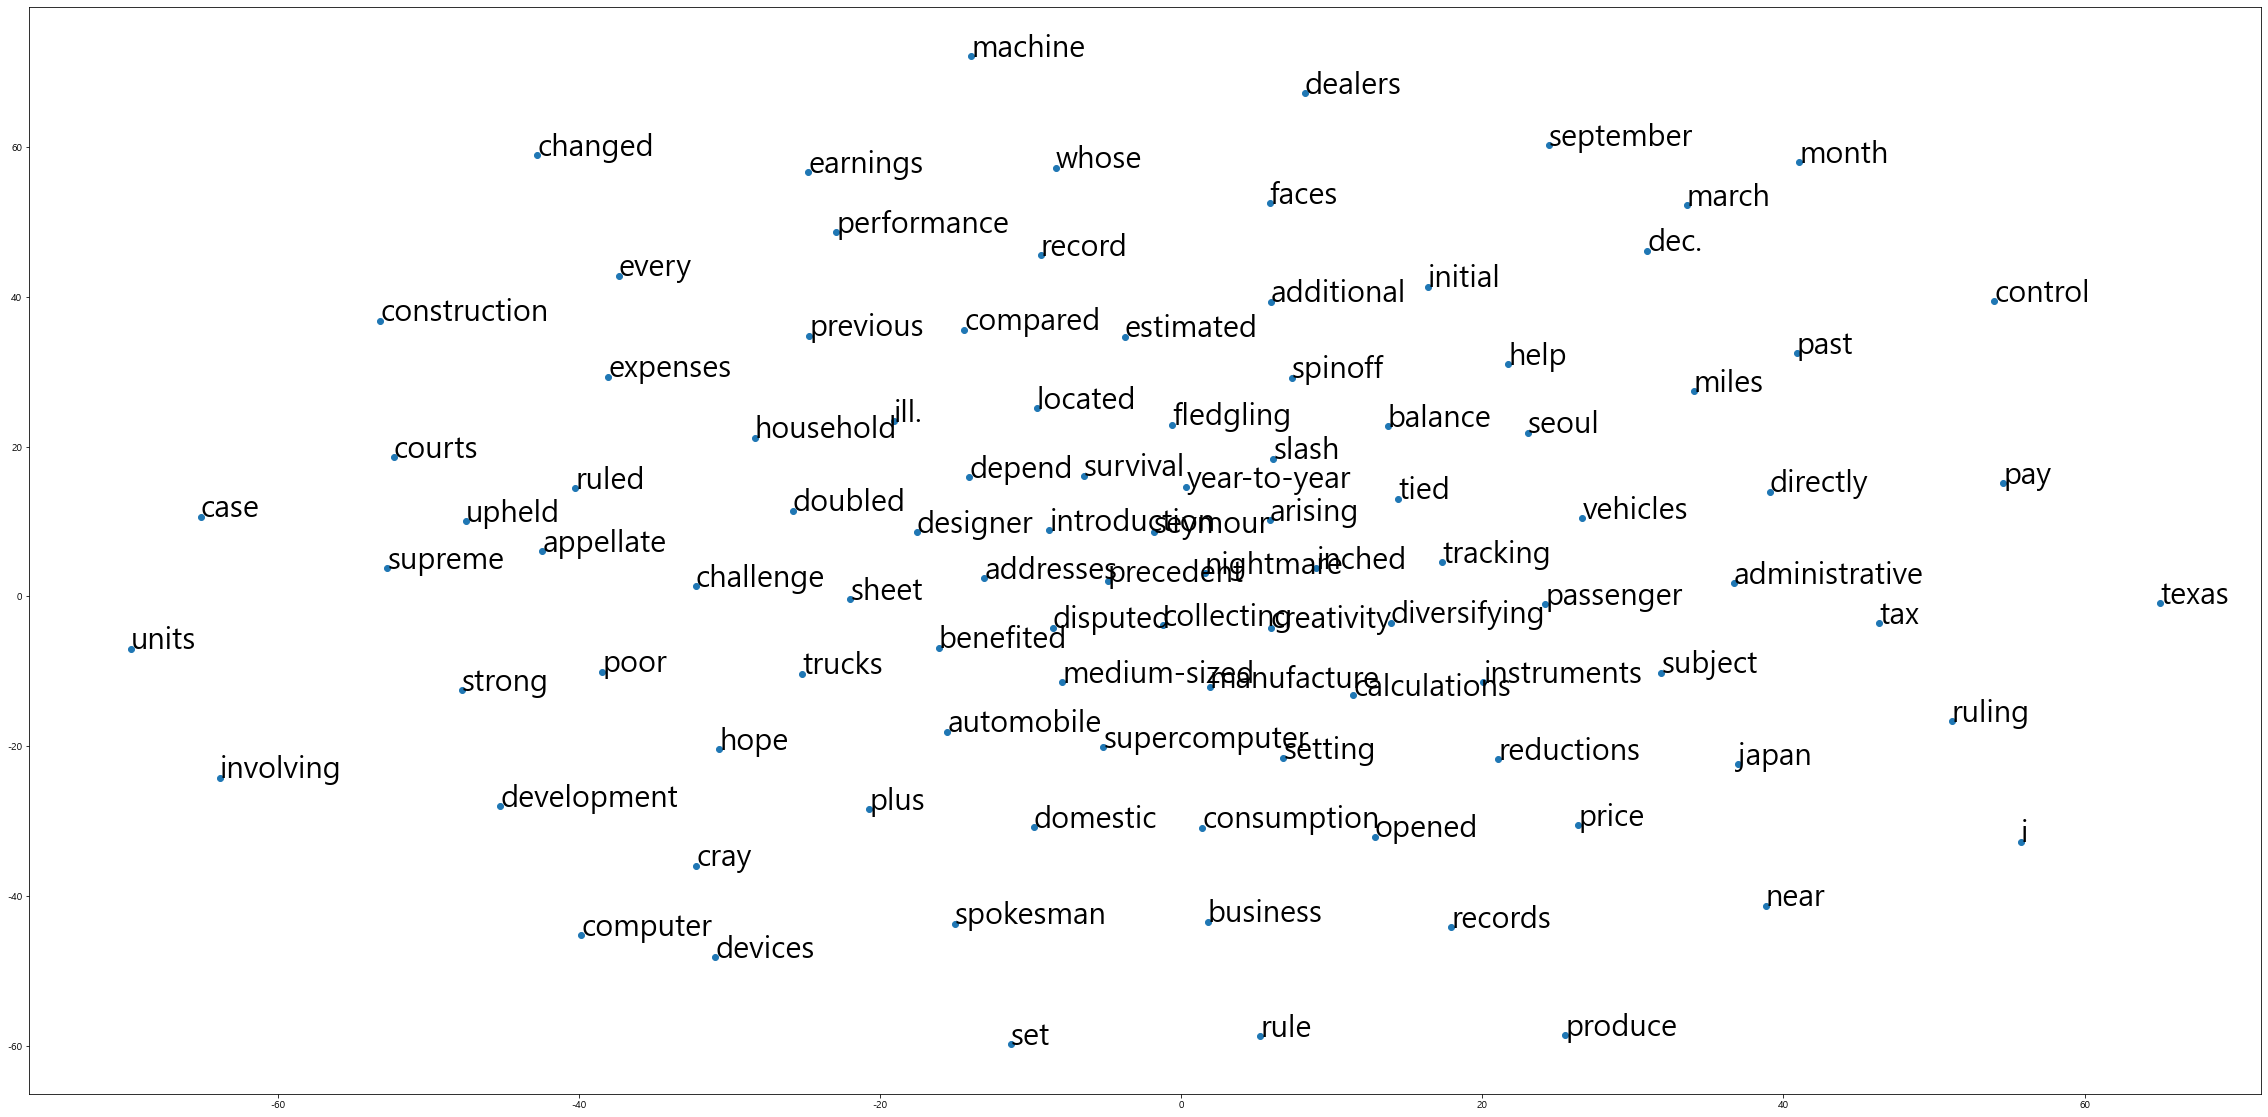

In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(U[1000:1100,:])

vocab = list(id_to_word.values())

df = pd.DataFrame(X_tsne, index=vocab[1000:1100], columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## Deep Learning2 - Ch.3

### inference based method (naive word2vec) - CBOW

In [3]:
class NaiveCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01*np.random.randn(V,H).astype('f')
        W_out = 0.01*np.random.randn(H,V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        self.word_vecs1 = W_in
        self.word_vecs2 = W_out.T
    
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:,0])
        h1 = self.in_layer1.forward(contexts[:,1])
        h = (h0+h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score,target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

importing Jupyter notebook from layers_collection2.ipynb


In [7]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)

contexts, targets = create_contexts_target(corpus, window_size)

targets = convert_one_hot(targets, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = NaiveCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, targets, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 262 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 263 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 264 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 265 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 266 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 267 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 268 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 269 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 270 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 271 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 272 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 273 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 274 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 275 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 276 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 277 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 278 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 279 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 280 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 281 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 282 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 283 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 284 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 285 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 286 |  반복 1

| 에폭 553 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 554 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 555 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 556 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 557 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 558 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 559 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 560 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 561 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 562 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 563 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 564 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 565 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 566 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 567 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 568 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 569 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 570 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 571 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 572 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 573 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 574 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 575 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 576 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 577 |  반복 1

| 에폭 832 |  반복 1 / 2 | 시간 1[s] | 손실 0.22
| 에폭 833 |  반복 1 / 2 | 시간 1[s] | 손실 0.48
| 에폭 834 |  반복 1 / 2 | 시간 1[s] | 손실 0.24
| 에폭 835 |  반복 1 / 2 | 시간 1[s] | 손실 0.44
| 에폭 836 |  반복 1 / 2 | 시간 1[s] | 손실 0.27
| 에폭 837 |  반복 1 / 2 | 시간 1[s] | 손실 0.35
| 에폭 838 |  반복 1 / 2 | 시간 1[s] | 손실 0.35
| 에폭 839 |  반복 1 / 2 | 시간 1[s] | 손실 0.25
| 에폭 840 |  반복 1 / 2 | 시간 1[s] | 손실 0.44
| 에폭 841 |  반복 1 / 2 | 시간 1[s] | 손실 0.22
| 에폭 842 |  반복 1 / 2 | 시간 1[s] | 손실 0.55
| 에폭 843 |  반복 1 / 2 | 시간 1[s] | 손실 0.24
| 에폭 844 |  반복 1 / 2 | 시간 1[s] | 손실 0.37
| 에폭 845 |  반복 1 / 2 | 시간 1[s] | 손실 0.34
| 에폭 846 |  반복 1 / 2 | 시간 1[s] | 손실 0.35
| 에폭 847 |  반복 1 / 2 | 시간 1[s] | 손실 0.25
| 에폭 848 |  반복 1 / 2 | 시간 1[s] | 손실 0.53
| 에폭 849 |  반복 1 / 2 | 시간 1[s] | 손실 0.13
| 에폭 850 |  반복 1 / 2 | 시간 1[s] | 손실 0.45
| 에폭 851 |  반복 1 / 2 | 시간 1[s] | 손실 0.34
| 에폭 852 |  반복 1 / 2 | 시간 1[s] | 손실 0.34
| 에폭 853 |  반복 1 / 2 | 시간 1[s] | 손실 0.26
| 에폭 854 |  반복 1 / 2 | 시간 1[s] | 손실 0.55
| 에폭 855 |  반복 1 / 2 | 시간 1[s] | 손실 0.32
| 에폭 856 |  반복 1

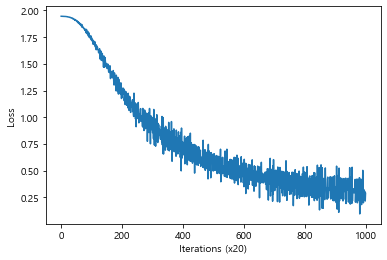

In [8]:
trainer.plot()

In [9]:
word_vecs1 = model.word_vecs1
for word_id, word in id_to_word.items():
    print(word, word_vecs1[word_id])

you [ 1.6661065   1.054921    0.93687207  0.93742526 -0.9588736 ]
say [ 0.31856588 -1.2416456  -1.2248963  -0.21911931  1.2417839 ]
goodbye [-0.5923161   0.87453926  1.0066246   1.1325974  -1.0275805 ]
and [ 1.442714   -0.97933763 -0.9605017   1.7163082   0.9784475 ]
i [-0.57767785  0.903266    1.0041533   1.1302525  -1.0021021 ]
hello [ 1.6649096   1.0440184   0.92678636  0.9541025  -0.95059747]
. [-1.4435289 -1.174948  -1.1629534 -1.3572112  1.1324809]


In [10]:
word_vecs2 = model.word_vecs2
for word_id, word in id_to_word.items():
    print(word, word_vecs2[word_id])

you [-0.8657106   0.42096272  0.14434637 -1.2373573   0.01415777]
say [ 1.7913795   1.0266169   0.91868573  0.70412016 -0.9067417 ]
goodbye [ 0.73008513 -0.60982573 -0.66453636  0.41661003  0.7025636 ]
and [-2.2228873   0.7803176   0.82315755  0.67598677 -0.7940011 ]
i [ 0.7424367  -0.6064755  -0.66030395  0.42385995  0.6973922 ]
hello [-1.9161136 -0.8445194 -0.9045065 -1.6649344  0.8976224]
. [-0.88210565  0.432674    0.1171654  -1.2152598   0.01200617]


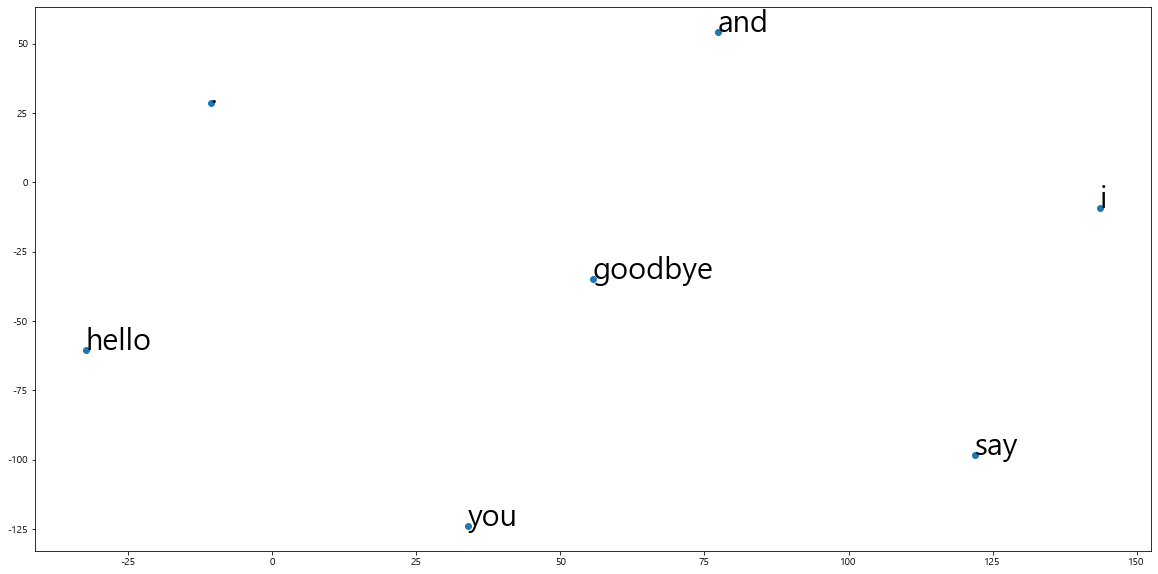

In [11]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(word_vecs2)

vocab = list(id_to_word.values())

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

### inference based method (naive word2vec) - skip-gram

In [12]:
class NaiveSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V,H).astype('f')
        W_out = 0.01 * np.random.randn(H,V).astype('f')
        
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()
        
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        self.word_vecs1 = W_in
        self.word_vecs2 = W_out.T
    
    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:,0])
        l2 = self.loss_layer2.forward(s, contexts[:,0])
        loss = l1+l2
        return loss
    
    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1+dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

In [13]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)

contexts, targets = create_contexts_target(corpus, window_size)

targets = convert_one_hot(targets, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = NaiveSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, targets, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 215 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 216 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 217 |  반복 1 / 2 | 시간 0[s] | 손실 2.85
| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 2.68
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 2.25
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 2.81
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 238 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 239 |  반복 1

| 에폭 442 |  반복 1 / 2 | 시간 1[s] | 손실 1.51
| 에폭 443 |  반복 1 / 2 | 시간 1[s] | 손실 1.47
| 에폭 444 |  반복 1 / 2 | 시간 1[s] | 손실 1.59
| 에폭 445 |  반복 1 / 2 | 시간 1[s] | 손실 1.52
| 에폭 446 |  반복 1 / 2 | 시간 1[s] | 손실 1.60
| 에폭 447 |  반복 1 / 2 | 시간 1[s] | 손실 1.46
| 에폭 448 |  반복 1 / 2 | 시간 1[s] | 손실 1.58
| 에폭 449 |  반복 1 / 2 | 시간 1[s] | 손실 1.45
| 에폭 450 |  반복 1 / 2 | 시간 1[s] | 손실 1.57
| 에폭 451 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 452 |  반복 1 / 2 | 시간 1[s] | 손실 1.05
| 에폭 453 |  반복 1 / 2 | 시간 1[s] | 손실 1.06
| 에폭 454 |  반복 1 / 2 | 시간 1[s] | 손실 1.95
| 에폭 455 |  반복 1 / 2 | 시간 1[s] | 손실 1.50
| 에폭 456 |  반복 1 / 2 | 시간 1[s] | 손실 1.50
| 에폭 457 |  반복 1 / 2 | 시간 1[s] | 손실 1.51
| 에폭 458 |  반복 1 / 2 | 시간 1[s] | 손실 1.94
| 에폭 459 |  반복 1 / 2 | 시간 1[s] | 손실 1.03
| 에폭 460 |  반복 1 / 2 | 시간 1[s] | 손실 1.50
| 에폭 461 |  반복 1 / 2 | 시간 1[s] | 손실 1.94
| 에폭 462 |  반복 1 / 2 | 시간 1[s] | 손실 1.02
| 에폭 463 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 464 |  반복 1 / 2 | 시간 1[s] | 손실 1.09
| 에폭 465 |  반복 1 / 2 | 시간 1[s] | 손실 1.46
| 에폭 466 |  반복 1

| 에폭 689 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 690 |  반복 1 / 2 | 시간 1[s] | 손실 1.31
| 에폭 691 |  반복 1 / 2 | 시간 1[s] | 손실 0.98
| 에폭 692 |  반복 1 / 2 | 시간 1[s] | 손실 0.95
| 에폭 693 |  반복 1 / 2 | 시간 1[s] | 손실 0.95
| 에폭 694 |  반복 1 / 2 | 시간 1[s] | 손실 0.91
| 에폭 695 |  반복 1 / 2 | 시간 1[s] | 손실 0.97
| 에폭 696 |  반복 1 / 2 | 시간 1[s] | 손실 1.29
| 에폭 697 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 698 |  반복 1 / 2 | 시간 1[s] | 손실 1.30
| 에폭 699 |  반복 1 / 2 | 시간 1[s] | 손실 0.21
| 에폭 700 |  반복 1 / 2 | 시간 1[s] | 손실 1.29
| 에폭 701 |  반복 1 / 2 | 시간 1[s] | 손실 0.94
| 에폭 702 |  반복 1 / 2 | 시간 1[s] | 손실 1.28
| 에폭 703 |  반복 1 / 2 | 시간 1[s] | 손실 0.54
| 에폭 704 |  반복 1 / 2 | 시간 1[s] | 손실 0.95
| 에폭 705 |  반복 1 / 2 | 시간 1[s] | 손실 0.91
| 에폭 706 |  반복 1 / 2 | 시간 1[s] | 손실 0.94
| 에폭 707 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 708 |  반복 1 / 2 | 시간 1[s] | 손실 1.60
| 에폭 709 |  반복 1 / 2 | 시간 1[s] | 손실 0.91
| 에폭 710 |  반복 1 / 2 | 시간 1[s] | 손실 0.55
| 에폭 711 |  반복 1 / 2 | 시간 1[s] | 손실 0.92
| 에폭 712 |  반복 1 / 2 | 시간 1[s] | 손실 0.89
| 에폭 713 |  반복 1

| 에폭 958 |  반복 1 / 2 | 시간 2[s] | 손실 0.34
| 에폭 959 |  반복 1 / 2 | 시간 2[s] | 손실 1.09
| 에폭 960 |  반복 1 / 2 | 시간 2[s] | 손실 0.34
| 에폭 961 |  반복 1 / 2 | 시간 2[s] | 손실 0.60
| 에폭 962 |  반복 1 / 2 | 시간 2[s] | 손실 0.34
| 에폭 963 |  반복 1 / 2 | 시간 2[s] | 손실 0.58
| 에폭 964 |  반복 1 / 2 | 시간 2[s] | 손실 1.09
| 에폭 965 |  반복 1 / 2 | 시간 2[s] | 손실 0.34
| 에폭 966 |  반복 1 / 2 | 시간 2[s] | 손실 0.34
| 에폭 967 |  반복 1 / 2 | 시간 2[s] | 손실 0.84
| 에폭 968 |  반복 1 / 2 | 시간 2[s] | 손실 0.59
| 에폭 969 |  반복 1 / 2 | 시간 2[s] | 손실 0.83
| 에폭 970 |  반복 1 / 2 | 시간 2[s] | 손실 0.09
| 에폭 971 |  반복 1 / 2 | 시간 2[s] | 손실 1.08
| 에폭 972 |  반복 1 / 2 | 시간 2[s] | 손실 0.09
| 에폭 973 |  반복 1 / 2 | 시간 2[s] | 손실 1.08
| 에폭 974 |  반복 1 / 2 | 시간 2[s] | 손실 0.58
| 에폭 975 |  반복 1 / 2 | 시간 2[s] | 손실 0.09
| 에폭 976 |  반복 1 / 2 | 시간 2[s] | 손실 0.83
| 에폭 977 |  반복 1 / 2 | 시간 2[s] | 손실 0.58
| 에폭 978 |  반복 1 / 2 | 시간 2[s] | 손실 0.83
| 에폭 979 |  반복 1 / 2 | 시간 2[s] | 손실 0.34
| 에폭 980 |  반복 1 / 2 | 시간 2[s] | 손실 0.83
| 에폭 981 |  반복 1 / 2 | 시간 2[s] | 손실 0.34
| 에폭 982 |  반복 1

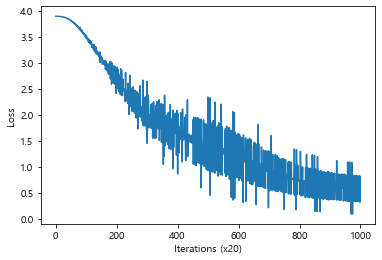

In [14]:
trainer.plot()

In [15]:
word_vecs1 = model.word_vecs1
for word_id, word in id_to_word.items():
    print(word, word_vecs1[word_id])

you [-0.003279   -0.00724841  0.0037793  -0.00918726  0.00576288]
say [ 1.1883588 -0.6090685 -1.2295752  1.0537595  0.9789699]
goodbye [-1.4116288  -1.1334553  -0.97891563  0.98253834  1.0087237 ]
and [-1.0057762 -1.0233291 -1.0304362 -1.1750221 -1.1719482]
i [1.0349003 1.1366413 1.1642165 1.0274622 1.0289319]
hello [-1.4042857 -1.1368345 -0.9705713  0.9812576  1.0101019]
. [-0.00245016  0.00497649  0.00090402 -0.00744527 -0.0154121 ]


In [16]:
word_vecs2 = model.word_vecs2
for word_id, word in id_to_word.items():
    print(word, word_vecs2[word_id])

you [ 0.543548   -0.30284116 -0.46881384  0.59442025  0.5510303 ]
say [-1.6368167  -0.80708003 -0.5262753   0.6024037   0.6219067 ]
goodbye [-0.78193796 -0.66032404 -0.64566463 -1.418907   -1.4357034 ]
and [1.0232366  1.459105   1.5346726  0.39183086 0.40574345]
i [ 0.5303404  -0.32952833 -0.472781    0.5773879   0.5581097 ]
hello [ 0.46142653  0.77587974  0.83188933 -1.0252669  -1.032601  ]
. [ 0.4580016   0.79046917  0.8222877  -1.0275733  -1.0299295 ]


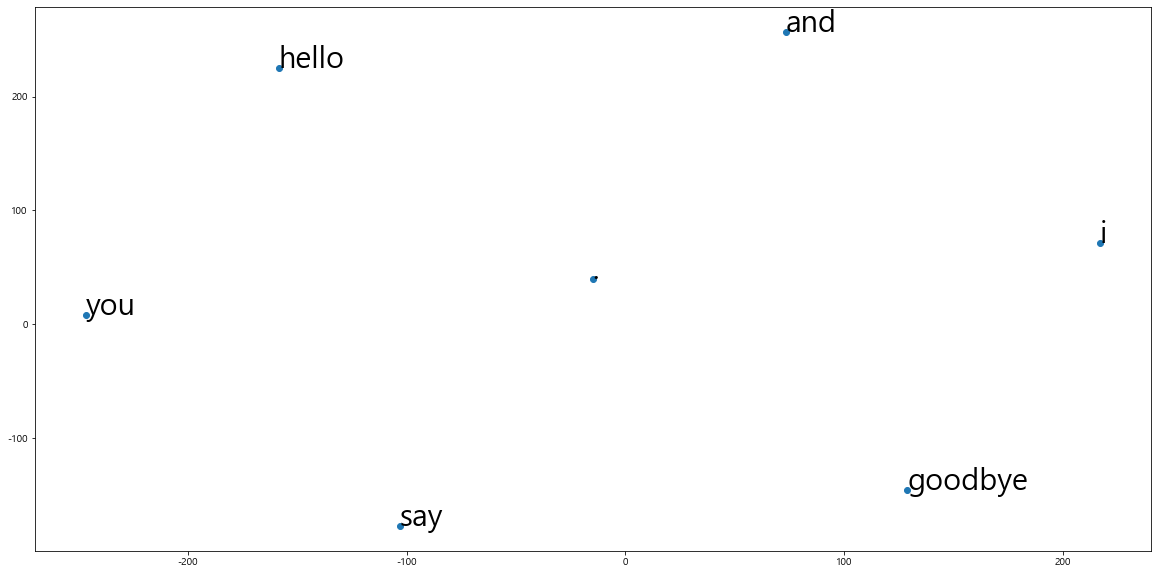

In [17]:
mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(word_vecs2)

vocab = list(id_to_word.values())

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## Deep Learning2 - Ch.4

### enhanced word2vec - CBOW

In [12]:
class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01*np.random.randn(V,H).astype('f')
        W_out = 0.01*np.random.randn(V,H).astype('f')
        
        self.in_layers = []
        for i in range(2*window_size):
            layer = Embedding(W_in)
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)
        
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        self.word_vecs1 = W_in
        self.word_vecw2 = W_out
    
    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss
    
    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None

In [13]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)

import config

config.GPU = False

if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)
    
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| 에폭 1 |  반복 1 / 9295 | 시간 0[s] | 손실 4.16
| 에폭 1 |  반복 2001 / 9295 | 시간 152[s] | 손실 2.72
| 에폭 1 |  반복 4001 / 9295 | 시간 324[s] | 손실 2.45
| 에폭 1 |  반복 6001 / 9295 | 시간 495[s] | 손실 2.36
| 에폭 1 |  반복 8001 / 9295 | 시간 649[s] | 손실 2.29
| 에폭 2 |  반복 1 / 9295 | 시간 775[s] | 손실 2.24
| 에폭 2 |  반복 2001 / 9295 | 시간 950[s] | 손실 2.16
| 에폭 2 |  반복 4001 / 9295 | 시간 1137[s] | 손실 2.12
| 에폭 2 |  반복 6001 / 9295 | 시간 1305[s] | 손실 2.08
| 에폭 2 |  반복 8001 / 9295 | 시간 1479[s] | 손실 2.05
| 에폭 3 |  반복 1 / 9295 | 시간 1598[s] | 손실 2.02
| 에폭 3 |  반복 2001 / 9295 | 시간 1763[s] | 손실 1.95
| 에폭 3 |  반복 4001 / 9295 | 시간 1925[s] | 손실 1.93
| 에폭 3 |  반복 6001 / 9295 | 시간 2095[s] | 손실 1.92
| 에폭 3 |  반복 8001 / 9295 | 시간 2258[s] | 손실 1.91
| 에폭 4 |  반복 1 / 9295 | 시간 2360[s] | 손실 1.89
| 에폭 4 |  반복 2001 / 9295 | 시간 2530[s] | 손실 1.82
| 에폭 4 |  반복 4001 / 9295 | 시간 2696[s] | 손실 1.82
| 에폭 4 |  반복 6001 / 9295 | 시간 2863[s] | 손실 1.81
| 에폭 4 |  반복 8001 / 9295 | 시간 3026[s] | 손실 1.80
| 에폭 5 |  반복 1 / 9295 | 시간 3140[s] | 손실 1.80
| 에폭 5 |  반복 200

<string>:60: RuntimeWarning: divide by zero encountered in log


| 에폭 7 |  반복 4001 / 9295 | 시간 5035[s] | 손실 inf
| 에폭 7 |  반복 6001 / 9295 | 시간 5204[s] | 손실 1.59
| 에폭 7 |  반복 8001 / 9295 | 시간 5371[s] | 손실 1.59
| 에폭 8 |  반복 1 / 9295 | 시간 5483[s] | 손실 1.59
| 에폭 8 |  반복 2001 / 9295 | 시간 5643[s] | 손실 1.52
| 에폭 8 |  반복 4001 / 9295 | 시간 5802[s] | 손실 1.53
| 에폭 8 |  반복 6001 / 9295 | 시간 5975[s] | 손실 1.53
| 에폭 8 |  반복 8001 / 9295 | 시간 6149[s] | 손실 1.54
| 에폭 9 |  반복 1 / 9295 | 시간 6255[s] | 손실 1.54
| 에폭 9 |  반복 2001 / 9295 | 시간 6447[s] | 손실 1.47
| 에폭 9 |  반복 4001 / 9295 | 시간 6611[s] | 손실 1.48
| 에폭 9 |  반복 6001 / 9295 | 시간 6784[s] | 손실 inf
| 에폭 9 |  반복 8001 / 9295 | 시간 6951[s] | 손실 1.49
| 에폭 10 |  반복 1 / 9295 | 시간 7056[s] | 손실 1.49
| 에폭 10 |  반복 2001 / 9295 | 시간 7229[s] | 손실 1.43
| 에폭 10 |  반복 4001 / 9295 | 시간 7402[s] | 손실 1.43
| 에폭 10 |  반복 6001 / 9295 | 시간 7569[s] | 손실 1.44
| 에폭 10 |  반복 8001 / 9295 | 시간 7732[s] | 손실 1.45


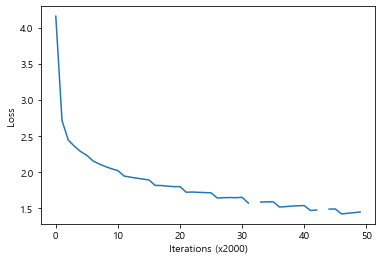

In [14]:
trainer.fit(contexts, target, max_epoch, batch_size, eval_interval = 2000)
trainer.plot()

In [38]:
word_vecs = model.word_vecs1
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl' 
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

pkl_file = 'cbow_params.pkl'
with open(pkl_file, 'rb') as f:
    params = pickle.load(f)

word_vecs = params['word_vecs']
word_to_id = params['word_to_id']
id_to_word = params['id_to_word']

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)
    
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)


[query] you
 i: 0.7392578125
 we: 0.732421875
 they: 0.62451171875
 your: 0.6083984375
 weird: 0.56103515625

[query] year
 month: 0.84814453125
 week: 0.7802734375
 summer: 0.77099609375
 spring: 0.7451171875
 decade: 0.6767578125

[query] car
 luxury: 0.62109375
 truck: 0.58935546875
 window: 0.58447265625
 auto: 0.5751953125
 cars: 0.54443359375

[query] toyota
 honda: 0.68505859375
 beretta: 0.62939453125
 engines: 0.61669921875
 nissan: 0.61083984375
 coated: 0.6025390625
--------------------------------------------------

[analogy] king:man = queen:?
 woman: 5.29296875
 a.m: 4.95703125
 carolinas: 4.65234375
 minute: 4.546875
 wife: 4.52734375

[analogy] take:took = go:?
 eurodollars: 5.1953125
 're: 4.51171875
 was: 4.43359375
 were: 4.28515625
 came: 4.24609375

[analogy] car:cars = child:?
 a.m: 7.07421875
 children: 5.5
 rape: 5.4921875
 adults: 5.3828125
 daffynition: 4.89453125

[analogy] good:better = bad:?
 rather: 5.76953125
 less: 5.3671875
 more: 5.30859375
 greater: 

### enhanced word2vec - skip-gram

In [3]:
class SkipGram:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        rn = np.random.randn

        W_in = 0.01 * rn(V, H).astype('f')
        W_out = 0.01 * rn(V, H).astype('f')

        self.in_layer = Embedding(W_in)
        self.loss_layers = []
        for i in range(2 * window_size):
            layer = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)
            self.loss_layers.append(layer)

        layers = [self.in_layer] + self.loss_layers
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)

        loss = 0
        for i, layer in enumerate(self.loss_layers):
            loss += layer.forward(h, contexts[:, i])
        return loss

    def backward(self, dout=1):
        dh = 0
        for i, layer in enumerate(self.loss_layers):
            dh += layer.backward(dout)
        self.in_layer.backward(dh)
        return None

In [4]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)

import config

config.GPU = False

if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)
    
model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| 에폭 1 |  반복 1 / 9295 | 시간 1[s] | 손실 41.59
| 에폭 1 |  반복 2001 / 9295 | 시간 1464[s] | 손실 28.08
| 에폭 1 |  반복 4001 / 9295 | 시간 2791[s] | 손실 24.99
| 에폭 1 |  반복 6001 / 9295 | 시간 3492[s] | 손실 24.51
| 에폭 1 |  반복 8001 / 9295 | 시간 4294[s] | 손실 24.30
| 에폭 2 |  반복 1 / 9295 | 시간 4774[s] | 손실 24.17
| 에폭 2 |  반복 2001 / 9295 | 시간 5561[s] | 손실 23.96
| 에폭 2 |  반복 4001 / 9295 | 시간 6411[s] | 손실 23.90
| 에폭 2 |  반복 6001 / 9295 | 시간 7013[s] | 손실 23.84
| 에폭 2 |  반복 8001 / 9295 | 시간 7577[s] | 손실 23.79
| 에폭 3 |  반복 1 / 9295 | 시간 7947[s] | 손실 23.74
| 에폭 3 |  반복 2001 / 9295 | 시간 8514[s] | 손실 23.50
| 에폭 3 |  반복 4001 / 9295 | 시간 9077[s] | 손실 23.50
| 에폭 3 |  반복 6001 / 9295 | 시간 9672[s] | 손실 23.49
| 에폭 3 |  반복 8001 / 9295 | 시간 10237[s] | 손실 23.48
| 에폭 4 |  반복 1 / 9295 | 시간 10595[s] | 손실 23.48
| 에폭 4 |  반복 2001 / 9295 | 시간 11154[s] | 손실 23.19
| 에폭 4 |  반복 4001 / 9295 | 시간 11709[s] | 손실 23.22
| 에폭 4 |  반복 6001 / 9295 | 시간 12270[s] | 손실 23.24
| 에폭 4 |  반복 8001 / 9295 | 시간 12829[s] | 손실 23.26
| 에폭 5 |  반복 1 / 9295 | 시간 13

<string>:60: RuntimeWarning: divide by zero encountered in log


| 에폭 9 |  반복 8001 / 9295 | 시간 25721[s] | 손실 inf
| 에폭 10 |  반복 1 / 9295 | 시간 26081[s] | 손실 22.75
| 에폭 10 |  반복 2001 / 9295 | 시간 26637[s] | 손실 22.43
| 에폭 10 |  반복 4001 / 9295 | 시간 27190[s] | 손실 22.52
| 에폭 10 |  반복 6001 / 9295 | 시간 27742[s] | 손실 22.62
| 에폭 10 |  반복 8001 / 9295 | 시간 28295[s] | 손실 22.66


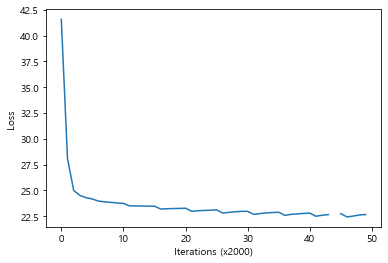

In [5]:
trainer.fit(contexts, target, max_epoch, batch_size, eval_interval = 2000)
trainer.plot()

In [7]:
import pickle

word_vecs = model.word_vecs
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'skipgram_params.pkl' 
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

pkl_file = 'skipgram_params.pkl'
with open(pkl_file, 'rb') as f:
    params = pickle.load(f)

word_vecs = params['word_vecs']
word_to_id = params['word_to_id']
id_to_word = params['id_to_word']

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)
    
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)


[query] you
 yourself: 0.67041015625
 your: 0.65869140625
 weird: 0.6484375
 we: 0.6064453125
 i: 0.6025390625

[query] year
 month: 0.6552734375
 earlier: 0.61328125
 week: 0.53173828125
 fiscal: 0.5205078125
 quarter: 0.498046875

[query] car
 cars: 0.6328125
 luxury: 0.58251953125
 truck: 0.537109375
 chevrolet: 0.5234375
 auto: 0.521484375

[query] toyota
 motor: 0.70166015625
 lexus: 0.685546875
 honda: 0.64501953125
 mazda: 0.63232421875
 infiniti: 0.62890625
--------------------------------------------------

[analogy] king:man = queen:?
 ghost: 1.814453125
 discarded: 1.7197265625
 daughter: 1.7080078125
 ten: 1.69921875
 vogelstein: 1.6806640625

[analogy] take:took = go:?
 eurodollars: 1.7646484375
 went: 1.6328125
 non-u.s.: 1.6103515625
 feet: 1.603515625
 clothes: 1.595703125

[analogy] car:cars = child:?
 rape: 2.208984375
 adults: 2.154296875
 non-violent: 1.97265625
 incest: 1.8408203125
 districts: 1.7822265625

[analogy] good:better = bad:?
 vary: 1.689453125
 non-u.